## Café e Robôs 

Um estudo detalhado das condições atuais do mercado de restaurantes e cafeterias em Los Angeles, enfocando a viabilidade e potencial de sucesso de uma cafeteria que emprega garçons robôs.

## importação de bibliotecas. 

Em um projeto de análise de dados, frequentemente utilizamos conjuntos pré-estabelecidos de funções e ferramentas, conhecidos como "bibliotecas". O processo de "importação de bibliotecas" é equivalente a adquirir acesso a essas ferramentas para que possam ser utilizadas no projeto atual. Isso nos permite aplicar métodos avançados de manipulação e análise de dados sem a necessidade de criar esses métodos do zero, economizando tempo e garantindo precisão e eficiência.

In [38]:
import pandas as pd
import numpy as np
import matplotlib as plot
import statistics
import scipy.stats as stats
import datetime as dt
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [39]:
rest = pd.read_csv('/datasets/rest_data_us.csv.')#armazenando o conjunto de dados 

## Pré-processamento de dados. 

O pré-processamento de dados é uma etapa essencial na análise de dados que envolve a limpeza e organização das informações coletadas. Nesta fase, corrigimos erros, removemos dados duplicados ou irrelevantes e preenchemos lacunas de informações ausentes. Esse processo assegura que os dados estejam em um formato correto e utilizável, servindo como uma base sólida para análises subsequentes. É uma etapa fundamental para garantir que as conclusões tiradas a partir dos dados sejam precisas e confiáveis.



In [40]:
rest.head(10)#imprmindo as 10 primeiras linhas do conjunto de dados. 

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


* object_name — nome de estabelecimento
* chain — estabelecimento de rede (TRUE/FALSE)
* object_type — tipo de estabelecimento
* address — endereço
* number — número de assentos

In [41]:
rest.info()#obtendo informações gerais do conjunto de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [42]:
rest.describe()#descrição de dados quantitativos do conjunto de dados

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [43]:
rest['chain'] = rest['chain'].fillna('unk') # substituindo valores ausentes na coluna 'chain' por 'unk'

## Conclusões parciais. 

O conjunto de dados apresenta dados bem sólidos, com todas as colunas possuindo o tipo de dado adequado, e apenas uma com valores ausentes que foram preenchidos com 'unk' afim de ter o maior aproveitamento possivel dos dados.  

## Análise exploratória.

A análise exploratória de dados é a etapa inicial em que examinamos cuidadosamente o conjunto de dados para identificar padrões, tendências e inconsistências. Essa fase utiliza gráficos e estatísticas resumidas para obter uma compreensão clara e inicial dos dados. É um processo crítico que orienta as decisões sobre as próximas etapas da análise, ajudando a formular questões e hipóteses precisas e direcionadas.

Vamos investigar as proporções de vários tipos de restaurantes e construír um gráfico. 

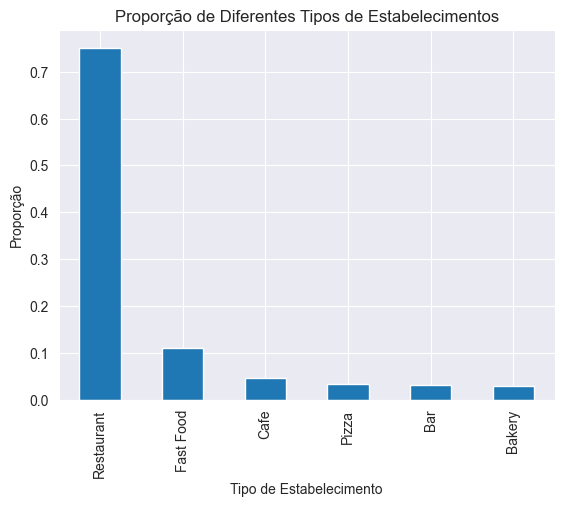

In [59]:
percent_rest = rest.value_counts('object_type')#contabilizando a quantidade de cada tipo de estabelecimento 
percent_rest = percent_rest/len(rest)#convertendo para porcentagem 
percent_rest.plot(kind='bar')# criando gráfico
plt.ylabel('Proporção')
plt.xlabel('Tipo de Estabelecimento')
plt.title('Proporção de Diferentes Tipos de Estabelecimentos')
sns.set_style('darkgrid')


Existem 6 tipos difentes de estabelecimentos listados no conjunto de dados, restaurantes representam mais de 75% do total, sendo assim maioria absoluta em relação aos demais. 

Vamos investigar as proporções de estabelecimentos de rede e não

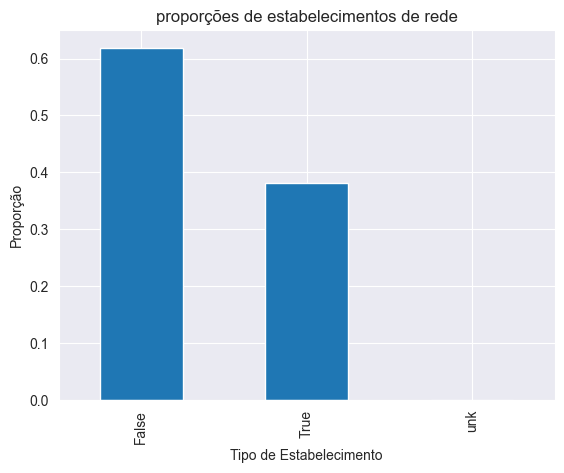

In [60]:
percent_rest = rest.value_counts('chain')#contabilizando a quantidade de cada tipo de estabelecimento 
percent_rest = percent_rest/len(rest)#convertendo para porcentagem 
percent_rest.plot(kind='bar')# criando gráfico
plt.ylabel('Proporção')
plt.xlabel('Tipo de Estabelecimento')
plt.title('proporções de estabelecimentos de rede')
sns.set_style('darkgrid')

Estabelecimentos de rede representam  aproximadamente 40% do total de estabelecimentos. 

Qual tipo de estabelecimento é típico para redes?

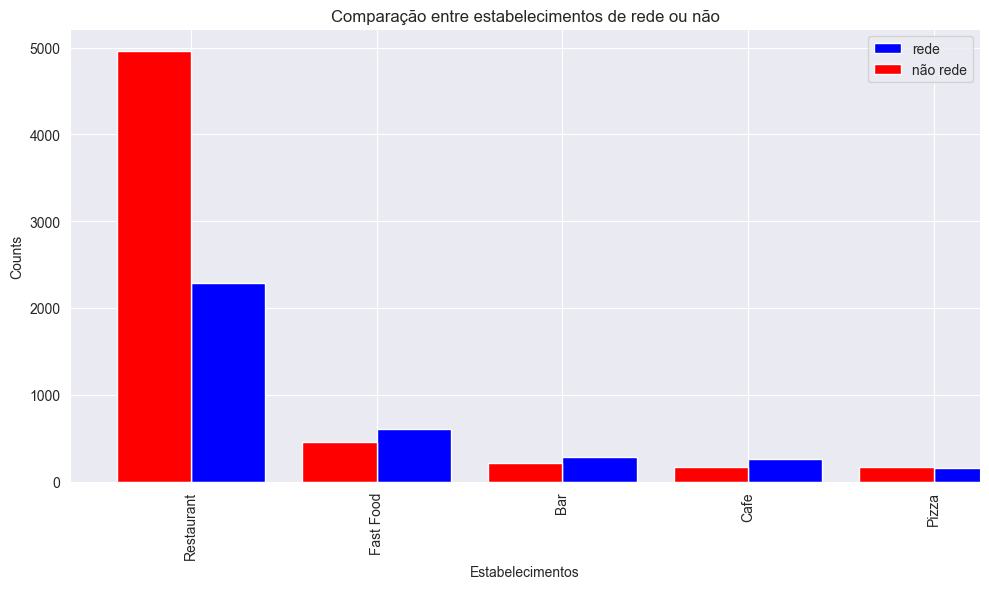

In [63]:
true_chain = rest[rest['chain'] == True]
true_chain = true_chain.value_counts('object_type')
false_chain = rest[rest['chain'] == False]
false_chain = false_chain.value_counts('object_type')
plt.figure(figsize=(10, 6))
true_chain.plot(kind='bar', position=0, width=0.4, label='rede', color='blue')
false_chain.plot(kind='bar', position=1, width=0.4, label='não rede', color='red')
plt.title('Comparação entre estabelecimentos de rede ou não')
plt.xlabel('Estabelecimentos')
plt.ylabel('Counts')
sns.set_style('darkgrid')
plt.legend()
plt.tight_layout()
plt.show()


Estabelecimentos de redes possuem mais unidades em todos os tipos de estabelecimentos exceto em restaurantes.

O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?

C:\Users\PC\AppData\Local\Temp\ipykernel_2864\4028948234.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  true_chain['object_name'] = true_chain['object_name'].str.replace('\d+', '').str.strip()


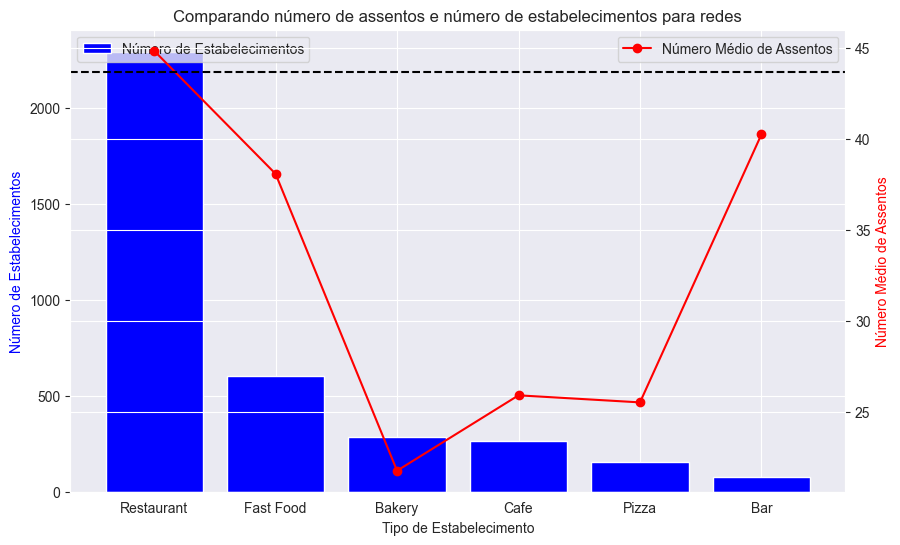

In [64]:
true_chain = rest
true_chain['object_name'] = true_chain['object_name'].str.replace('\d+', '').str.strip()
true_chain = true_chain[true_chain['chain'] == True]
true_chain = true_chain.pivot_table(index='object_type', values='number', aggfunc={'count', 'mean'})
true_chain = true_chain.sort_values(by='count', ascending=False)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(true_chain.index, true_chain['count'], color='blue')
ax2 = ax1.twinx()
sns.set_style('darkgrid')
ax2.plot(true_chain.index, true_chain['mean'], color='red', marker='o')
ax1.set_ylabel('Número de Estabelecimentos', color='blue')
ax2.set_ylabel('Número Médio de Assentos', color='red')
ax1.set_xlabel('Tipo de Estabelecimento')
ax1.legend(['Número de Estabelecimentos'], loc='upper left')
ax2.legend(['Número Médio de Assentos'], loc='upper right')
plt.axhline(y= rest['number'].mean(), color='black', linestyle='--')
plt.title('Comparando número de assentos e número de estabelecimentos para redes')
plt.show()


Estabelecimentos de rede possuem menos unidades do que a média para o tipo de estabelecimento, exceto restaurantes. 

Em média, qual tipo de restaurante tem o maior número de assentos? 

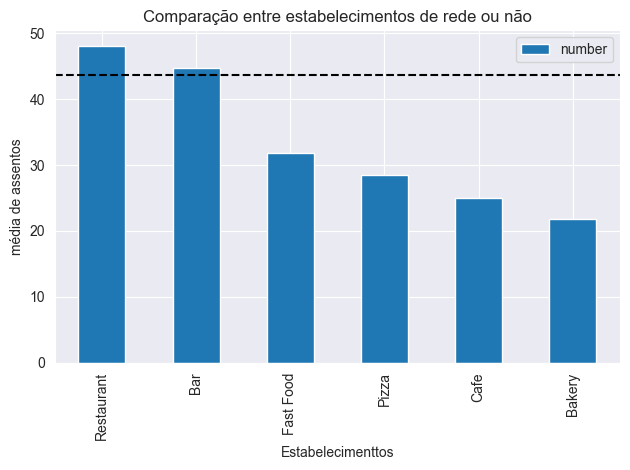

In [68]:
mean_number = rest.pivot_table(index='object_type', values = 'number', aggfunc= 'mean')
mean_number = mean_number.sort_values(by='number', ascending= False)
mean_number_total = rest['number'].mean()
mean_number.plot(kind = 'bar')
plt.axhline(y=mean_number_total, color='black', linestyle='--')
sns.set_style('darkgrid')
plt.title('Comparação entre estabelecimentos de rede ou não')
plt.xlabel('Estabelecimenttos')
plt.ylabel('média de assentos')
plt.legend()
plt.tight_layout()
plt.show()

Restaurantes possuem o maior média de número de assentos em comparação com todos os outros.

Colocando os dados dos nomes das ruas da coluna address em uma coluna separada.

In [49]:
rest[['number_street', 'street','extra_info']]=rest['address'].str.extract(r'(?P<number_street>\d+)\s+(?P<street>[^#]+)\s*(?P<extra_info>#.*)?')
rest

,id,object_name,address,chain,object_type,number,number_street,street,extra_info
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708,N EAGLE ROCK BLVD,NaN
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100,WORLD WAY,# 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801,HOLLYWOOD BLVD,# 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814,W SUNSET BLVD,NaN
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100,ECHO PARK AVE,NaN
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,217,W TEMPLE AVE,NaN
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750,MELROSE AVE,NaN
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,6741,HOLLYWOOD BLVD,NaN
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,548,S SPRING ST STE 100,NaN


Um gráfico de dez ruas com o maior número de restaurantes.

<Axes: xlabel='street'>

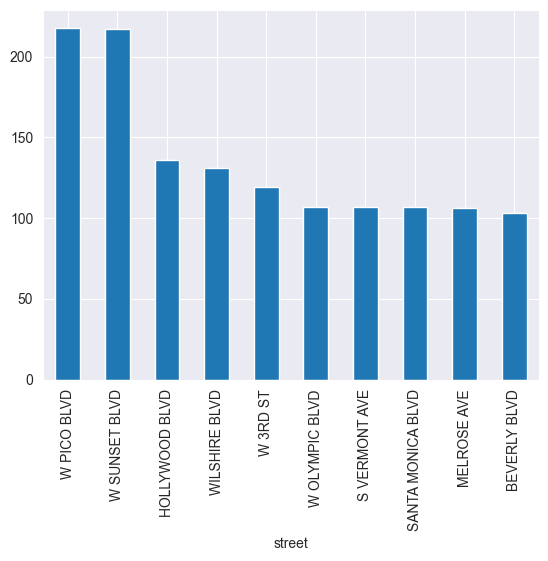

In [66]:
count_street = rest[rest['object_type']=='Restaurant']
count_street = count_street.value_counts('street')
count_street = count_street.head(10)
sns.set_style('darkgrid')
count_street.plot(kind='bar')


In [58]:
count_street = rest[rest['object_type']=='Restaurant']
count_street =  count_street.pivot_table(index='street', values = 'object_type', aggfunc='count')
count_street = count_street[count_street['object_type']==1]
print(count_street.count())

object_type    1165
dtype: int64


Existem mais de 1100 ruas com apenas 1 restaurante. 

## Conclusão 

* Existem 6 tipos difentes de estabelecimentos listados no conjunto de dados, restaurantes representam mais de 75% do total, sendo assim maioria absoluta em relação aos demais. 
* Estabelecimentos de rede representam  aproximadamente 40% do total de estabelecimentos. 
* Estabelecimentos de redes possuem mais unidades em todos os tipos de estabelecimentos exceto em restaurantes.
* Estabelecimentos de rede possuem menos unidades do que a média para o tipo de estabelecimento, exceto restaurantes. 
* Restaurantes possuem o maior média de número de assentos em comparação com todos os outros.
* Existem mais de 1100 ruas com apenas 1 restaurante. 

Presentation: <https://docs.google.com/presentation/d/1K_mi0Ig1spLsMIFHHk0bMkFW_x9f8mntZ6zapY7WuyU/edit?usp=sharing>